In [1]:
import numpy as np
from sklearn.mixture import GMM
from graph_lassov5 import GraphLassoMix
from tools.gm_tools_old import gaussian_mixture_sample, gm_params_generator, best_cont_matrix

In [2]:
def center_gen(dim, k):
    centers = []
    for i in range(k):
        center_id = [int(x) for x in bin(i).split("b")[1]]
        complement = [0 for _ in range(dim-len(center_id))]
        centers.append(complement+center_id)
    return np.array(centers)

In [3]:
d = 10
N = 100
k = 7

In [4]:
#_, centers, cov = gm_params_generator(d, k)
centers = center_gen(d,k)
weights = 1./k*np.ones(k)
cov = 1e-3*np.array([np.diag(np.ones(d)) for _ in range(k)])
X, Y = gaussian_mixture_sample(weights, centers, cov, N)
lasso = GraphLassoMix(n_components=k, n_iter=20)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

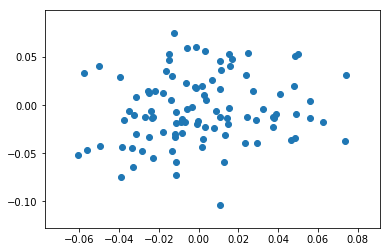

In [6]:
plt.scatter(X[:,0], X[:,1])

In [7]:

def algo_score(Y, y_estim, t=0):
    mat, permut, diag_sum = best_cont_matrix(Y, y_estim)
    return permut

In [8]:
lasso.fit(X)
y_lasso = lasso.clusters_assigned

gmm = GMM(n_components=k, covariance_type="full")
gmm.fit(X)
y_em = gmm.predict(X)

# print "===Glasso result==="
permut_lasso = algo_score(Y, y_lasso)

# print "\n===EM result==="
permut_gmm = algo_score(Y, y_em)

/usr/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multiva

In [9]:
permut_lasso

[3, 2, 6, 5, 0]

In [10]:
permut_gmm

[2, 1, 5, 4, 0, 3, 6]

In [11]:
l = []
for idx, val in enumerate(permut_lasso):
    l.append(1. / (cov[idx].shape[0] ** 2) * np.linalg.norm(np.linalg.inv(cov[idx]) - lasso.omegas[val]))
    #
l2 = []
for idx, val in enumerate(permut_gmm):
    l2.append(1. / (cov[idx].shape[0] ** 2) * np.linalg.norm(np.linalg.inv(cov[idx]) - np.linalg.inv(gmm.covars_[val])))

print max(l), max(l2)

31.3364300426 15.2528209951


In [190]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(3)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [162]:
from os import listdir
from os.path import isfile, join
import pickle
simu_folder = "graph_res/"
folder = "./"+simu_folder+"/"
onlyfiles = [f for f in listdir(folder) if (isfile(join(folder, f)) and f.startswith("res_"))]
res = []
for f in onlyfiles:
    res.append(pickle.load(open(folder+f)))

In [115]:
import pandas as pd

In [116]:
df = pd.DataFrame(res)

In [139]:
import seaborn as sns
def gen_graph_dict_gen_loss(df, p):
    df_temp = df[(df.p==p)]
    df_temp2 = df_temp.drop(['p', 'X', 'time_lasso', 'time_em'], axis=1)
    df2 = pd.melt(df_temp2, id_vars=["N","K"], var_name="Type", value_name="loss")
    df2.loss = df2.loss.apply(max)
    #return df2
    ##set(df2["Type"])
    ##df3 = pd.melt(df2, id_vars=["N"], var_name="comp", value_name="weight")
    #df3 = pd.concat([df2, df2.apply(extract_type, axis =1)], axis=1)
    ##df5 = df4.apply(remove_method_comp, axis=1)
    #df4 = df3.replace([np.inf, -np.inf], np.nan).dropna(subset=["loss"], how="all")
    plt.figure(figsize=(10,5))
    boxplot = sns.boxplot(x="K", y="loss", data=df2, hue="Type",
                         palette=["#ff6666", "#ffd966", "#b3ff66"])
    for patch in boxplot.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 1))
    boxplot.set_yscale("log")
    #if metric == 'L2':
    #    boxplot.set_ylabel(r'$L_2$-Loss')
    #else:
    #    boxplot.set_ylabel(metric+'-Loss')
    boxplot.set_xlabel('')
#
    sns_plot = boxplot.get_figure()

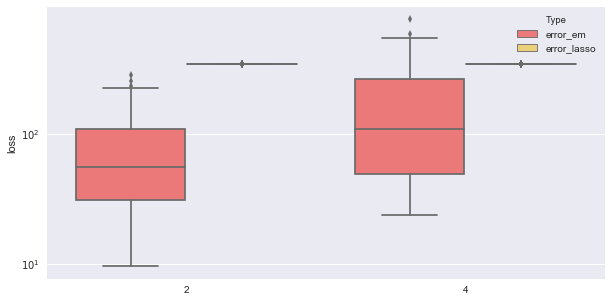

In [140]:
gen_graph_dict_gen_loss(df, 2)

In [92]:
df3.loss = df3.loss.apply(max)

In [126]:
df.N

0       100
1       100
2      1000
3      1000
4      1000
5      1000
6      1000
7      1000
8      1000
9      1000
10     1000
11     1000
12     1000
13     1000
14     1000
15     1000
16     1000
17     1000
18     1000
19     1000
20     1000
21     1000
22     1000
23     1000
24     1000
25     1000
26     1000
27     1000
28     1000
29     1000
       ... 
403     100
404     100
405     100
406     100
407     100
408     100
409     100
410     100
411     100
412     100
413     100
414     100
415     100
416     100
417     100
418     100
419     100
420     100
421     100
422     100
423     100
424     100
425     100
426     100
427     100
428     100
429     100
430     100
431     100
432     100
Name: N, dtype: int64